In [66]:
from random import randint

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data

sns.set(font_scale=1.5, palette='colorblind')

# MNIST classification

In [52]:
mnist = fetch_mldata('MNIST original', data_home='~/workspace/ds/MNIST')

In [53]:
X, y = mnist['data'], mnist['target']

In [54]:
X.shape

(70000, 784)

In [55]:
digit = X[36000]
digit_image = digit.reshape(28, 28)
y[36000]

5.0

(-0.5, 27.5, 27.5, -0.5)

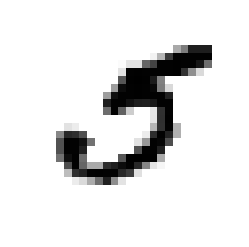

In [56]:
plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
shuffle_index = np.random.permutation(60000)

In [9]:
shuffle_index

array([ 7837, 33903, 24440, ..., 12235, 14155, 56369])

In [10]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary classifier: 5 or not 5?

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [25]:
sgd_clf = SGDClassifier(loss='log', random_state=42)

In [26]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/srom/workspace/ds/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/srom/workspace/ds/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

array([0.95825, 0.9601 , 0.95145])

In [29]:
class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [30]:
never_5 = Never5Classifier()
cross_val_score(never_5, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91065, 0.9101 , 0.9082 ])

In [34]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/srom/workspace/ds/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/srom/workspace/ds/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

In [35]:
confusion_matrix(y_train_5, y_train_pred)

array([[53996,   583],
       [ 2021,  3400]])

In [36]:
confusion_matrix(y_train_5, cross_val_predict(never_5, X_train, y_train_5, cv=3))

array([[54579,     0],
       [ 5421,     0]])

In [40]:
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.8536279186542807
Recall: 0.6271905552481092


In [42]:
f1_score(y_train_5, y_train_pred)

0.7230965546575924

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

/Users/srom/workspace/ds/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/srom/workspace/ds/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

In [45]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Text(0,0.5,'recall')

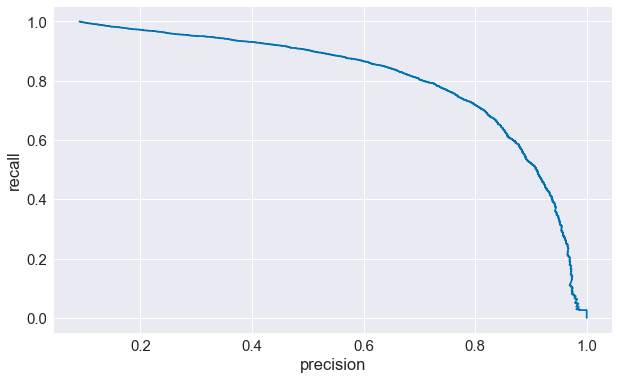

In [72]:
f, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(precisions, recalls)
ax.set_xlabel('precision')
ax.set_ylabel('recall')

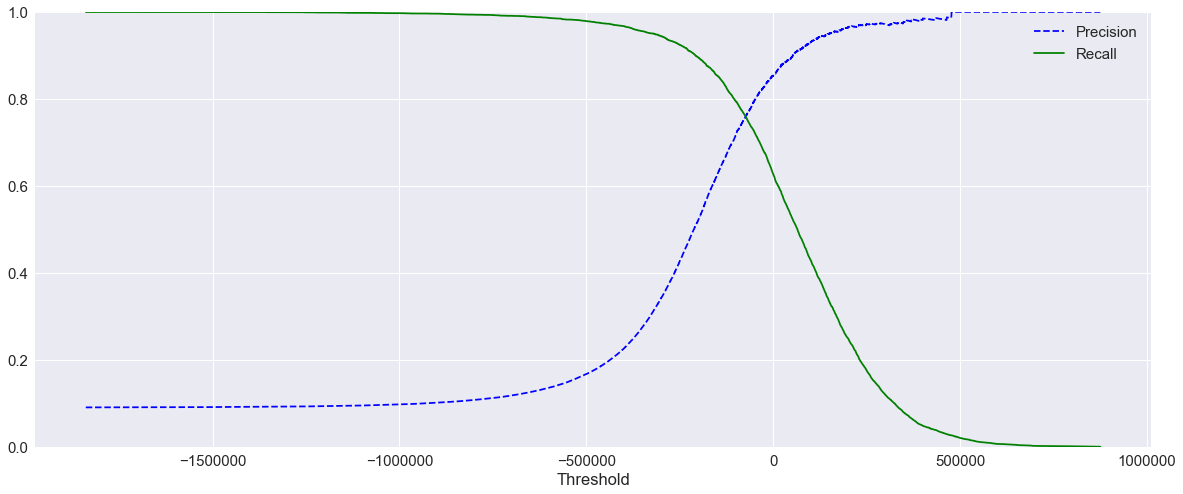

In [71]:
f, ax = plt.subplots(1, figsize=(20, 8))
ax.plot(thresholds, precisions[:-1], "b--", label="Precision")
ax.plot(thresholds, recalls[:-1], "g-", label="Recall")
ax.set_xlabel("Threshold")
ax.legend(loc="upper left")
ax.set_ylim([0, 1])
ax.legend()

## Multiclass classifier

In [15]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [16]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [17]:
with tf.name_scope("dnn"):
    hidden1 = fully_connected(X, n_hidden1)
    hidden_2 = fully_connected(hidden1, n_hidden2)
    logits = fully_connected(hidden1, n_hidden2, activation_fn=None)

In [18]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss") 

In [19]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [20]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [21]:
mnist = input_data.read_data_sets("/tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [22]:
n_epochs = 50
batch_size = 50

In [23]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, _, y_batch, _ = train_test_split(
                X_train, y_train, train_size=batch_size, random_state=int(time.time()))
            
            sess.run(training_op, feed_dict={X_p: X_batch, y_p: y_batch})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})

        print(epoch, 'Train accuracy:', acc_train, 'Test accuracy:', acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.96 Test accuracy: 0.8897
1 Train accuracy: 0.92 Test accuracy: 0.91
2 Train accuracy: 0.86 Test accuracy: 0.9157
3 Train accuracy: 0.88 Test accuracy: 0.9242
4 Train accuracy: 0.96 Test accuracy: 0.926
5 Train accuracy: 0.94 Test accuracy: 0.929
6 Train accuracy: 0.9 Test accuracy: 0.9317
7 Train accuracy: 0.94 Test accuracy: 0.9359
8 Train accuracy: 0.96 Test accuracy: 0.9381
9 Train accuracy: 0.9 Test accuracy: 0.9403
10 Train accuracy: 0.94 Test accuracy: 0.9427
11 Train accuracy: 0.96 Test accuracy: 0.9424
12 Train accuracy: 0.94 Test accuracy: 0.946
13 Train accuracy: 0.98 Test accuracy: 0.9484
14 Train accuracy: 0.92 Test accuracy: 0.9494
15 Train accuracy: 0.98 Test accuracy: 0.9513
16 Train accuracy: 0.96 Test accuracy: 0.9529
17 Train accuracy: 0.88 Test accuracy: 0.953
18 Train accuracy: 0.98 Test accuracy: 0.9547
19 Train accuracy: 0.98 Test accuracy: 0.9562


KeyboardInterrupt: 

In [ ]:
test_instance_nb = randint(0, mnist.test.num_examples)

with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = [mnist.test.images[test_instance_nb]]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

label = mnist.test.labels[test_instance_nb]

print
print('Prediction:', y_pred[0], '\nExpected:', label, '\n{}'.format('Yaaay' if label == y_pred[0] else 'Noooes'))

x = mnist.test.images[test_instance_nb].reshape([28, 28])
plt.gray()
plt.axis('off')
_ = plt.imshow(x)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    all_X_test = mnist.test.images
    Z = logits.eval(feed_dict={X: all_X_test})
    y_pred = np.argmax(Z, axis=1)
    
    y_nope = [i for i, y_hat in enumerate(y_pred) if y_hat != mnist.test.labels[i]]
    
len(y_nope)

In [ ]:
test_instance_nb = randint(0, len(y_nope))
idx = y_nope[test_instance_nb]

with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = [mnist.test.images[idx]]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

label = mnist.test.labels[idx]

print
print('Prediction:', y_pred[0], '\nExpected:', label, '\n{}'.format('Yaaay' if label == y_pred[0] else 'Noooes'))

x = X_new_scaled[0].reshape([28, 28])
plt.gray()
plt.axis('off')
_ = plt.imshow(x)